In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
import seaborn as sp
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("crime_data.csv")
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
scaling=MinMaxScaler()
norm=scaling.fit_transform(df[["Rape","Murder"]])

In [5]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
x=df[['Murder', 'Assault', 'UrbanPop', 'Rape']]
x.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# Clustering 

# Hierarchical clustering

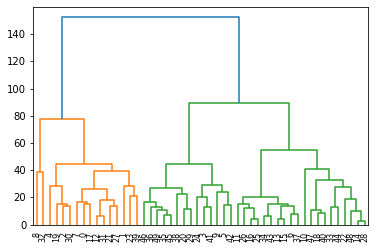

In [9]:
dendrogram=sch.dendrogram(sch.linkage(x,method='average'))

In [10]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [11]:
h=hc.fit_predict(x)

In [12]:
df["Hierarchical clustering"]=h

# Using Kmeans

In [13]:
df.shape

(50, 6)

In [14]:
#using grid search instead of providing k every single time
array=[]
for i in range (1,11):
    kmeans=KMeans(i,random_state=42)
    kmeans.fit(x)
    array.append(kmeans.inertia_)

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
kmeans.labels_

array([1, 8, 5, 6, 5, 6, 0, 1, 4, 6, 3, 0, 1, 0, 3, 0, 0, 1, 7, 5, 9, 1,
       3, 8, 6, 0, 0, 1, 3, 9, 5, 1, 4, 3, 0, 2, 2, 0, 9, 8, 7, 6, 6, 0,
       3, 2, 2, 7, 3, 2])

# plotting elbow curve

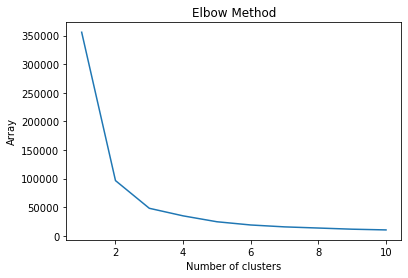

In [16]:
plt.plot(range(1, 11), array)
plt.title('Elbow Method') # prints graph name
plt.xlabel('Number of clusters')# prints label on x axis
plt.ylabel('Array')# prints label on y
plt.show()

In [17]:
df["cluster_id"]=kmeans.labels_
df.head(4)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical clustering,cluster_id
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,8
2,Arizona,8.1,294,80,31.0,0,5
3,Arkansas,8.8,190,50,19.5,2,6


# For k=2

In [18]:
array=[]
kmeans=KMeans(2,random_state=42)
kmeans.fit(x)
array.append(kmeans.inertia_)

In [19]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [20]:
df["cluster_id1"]=kmeans.labels_
df.head(4)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical clustering,cluster_id,cluster_id1
0,Alabama,13.2,236,58,21.2,0,1,0
1,Alaska,10.0,263,48,44.5,0,8,0
2,Arizona,8.1,294,80,31.0,0,5,0
3,Arkansas,8.8,190,50,19.5,2,6,0


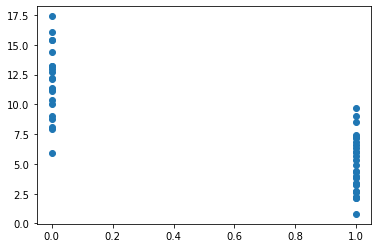

In [21]:
plt.scatter(df["cluster_id1"],df["Murder"])

# Dbscan

In [22]:
cluster_new=DBSCAN(eps=4,min_samples=7)
cluster_new.fit(x)

DBSCAN(eps=4, min_samples=7)

In [23]:
cluster_new.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [24]:
df["Dbscan"]=cluster_new.labels_

In [25]:
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical clustering,cluster_id,cluster_id1,Dbscan
0,Alabama,13.2,236,58,21.2,0,1,0,-1
1,Alaska,10.0,263,48,44.5,0,8,0,-1
2,Arizona,8.1,294,80,31.0,0,5,0,-1
3,Arkansas,8.8,190,50,19.5,2,6,0,-1
4,California,9.0,276,91,40.6,0,5,0,-1


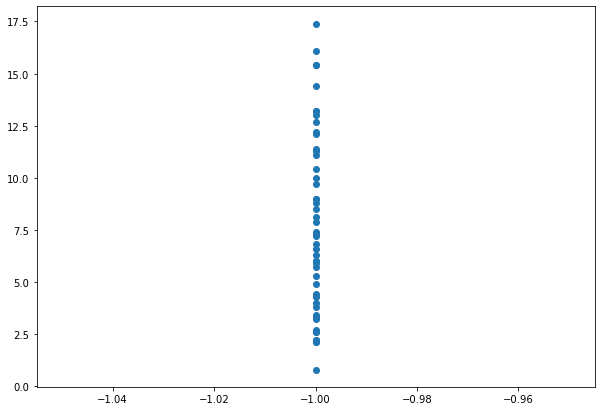

In [26]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Dbscan'],df['Murder']) 